# Modeling New Homes

Now that we have explored our data, and cleaned it up into an acceptable format, we are ready to run some modeling techniques on it. We will begin by building multiple generic models on the data set to see how well it performs. After this, we will build a Neural Network to see if we can improve the performance from the baseline models.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

### Loading Dataset

This dataset is already cleaned up and preprocessed. It is expected that this dataset has the following columns:
* SALEPRICE

> NOTE/TODO: Currently, we don't do anything with the PROPERTYZIP. We plan to build a model for each zipcode, but that is pending our preliminary results (to see if we need to even attempt such a thing).

In [2]:
# Loading Data
data = pd.read_csv('New&Old_Dataset.csv')

# Renaming columns to not include brackets, spaces, or commas
column_mapping = {}
for col in list(data.columns):

    new_col = col.replace(']', ')')
    new_col = new_col.replace('[', '(')
    new_col = new_col.replace(', ', '-')
    new_col = new_col.replace(' ', '')
    column_mapping[col] = new_col

data = data.rename(columns=column_mapping)

# Drop Nulls
data = data.dropna()

In [3]:
data.head()

,Unnamed:0,STYLE,ROOF,EXTFINISH,BASEMENT,ZIPCODE,HOOD,YEARSOLD,SALEDATE,COUNTS,CDU,GRADE,CONDITION,LOTAREA,COUNTYTOTAL,FAIRMARKETTOTAL,LOCALTOTAL,COUNTYBUILDING,FAIRMARKETBUILDING,LOCALBUILDING,COUNTYLAND,FAIRMARKETLAND,LOCALLAND,STORIES,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,FINISHEDLIVINGAREA,SALEPRICE
0,641,-0.303931,-0.265942,-0.589793,-0.224377,-0.564653,0.331983,1.516801,-0.458779,2.613600,1.913839,2.251515,-0.024149,-0.281497,-0.874990,-1.006727,-1.007198,-0.735549,-0.901947,-0.901939,-1.016494,-1.013983,-1.016494,0.766431,5.756835,8.233151,0.722964,-1.002785,2.189426,68000.0
1,1405,-0.090068,-0.265942,-0.589793,-0.224377,-0.564653,0.281821,-1.063989,1.506467,-1.013714,0.092595,0.277164,-0.024149,-0.236151,-0.120314,-0.087620,-0.087372,-0.180364,-0.138909,-0.138902,0.086367,0.084945,0.086367,-1.247330,-0.422909,-0.171715,-0.797325,0.726911,-0.361635,60500.0
2,1409,0.230726,-0.265942,-0.589793,-0.224377,-0.564653,0.281821,-1.063989,1.497984,-1.021271,0.092595,0.277164,-0.024149,-0.240988,-0.195591,-0.162321,-0.162131,-0.263583,-0.221463,-0.221456,0.055827,0.054513,0.055827,-1.247330,-0.422909,-0.171715,-0.797325,0.726911,-0.413089,65500.0
3,1410,0.230726,-0.265942,2.241142,-0.224377,-0.564653,0.281821,-1.063989,1.499130,-1.021271,0.092595,0.277164,-0.024149,-0.240988,-0.163193,-0.130172,-0.129956,-0.223162,-0.181366,-0.181358,0.055827,0.054513,0.055827,-1.247330,-0.422909,-0.171715,-0.797325,0.726911,-0.476730,65500.0
4,1437,1.406970,-0.265942,2.241142,-0.224377,-0.564653,0.281821,-1.494121,-0.301046,1.729442,0.092595,0.277164,-0.024149,-0.260538,0.115046,0.145939,0.146370,0.170341,0.208998,0.209005,-0.076517,-0.077358,-0.076517,0.766431,-0.422909,-0.171715,0.722964,0.726911,-0.266850,167000.0


## Build two Models
We have to types of homes:
1. The home has a previous Sale Price.
2. The home does not have a previous Sale Price.

We believe that we can get better results if we build two models on these two datasets seperately.

In [4]:
# Model for New Homes
print("Data Shape: ", data.shape)

Data Shape:  (125429, 30)


## Train/Validation/Test Split

We will split our dataset into three sets:
* Training - (77%)
* Validation - (16.5%)
* Testing - (16.5%)

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(['Unnamed:0', 'SALEPRICE'], axis=1)
Y = data['SALEPRICE']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=True, random_state=100) # Reproducible
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=100) # Reproducible

print("Training Shape: ", X_train.shape)
print("Validation Shape: ", X_val.shape)
print("Testing Shape: ", X_test.shape)

Training Shape:  (84037, 28)
Validation Shape:  (20696, 28)
Testing Shape:  (20696, 28)


In [6]:
X_train.head(1)

,STYLE,ROOF,EXTFINISH,BASEMENT,ZIPCODE,HOOD,YEARSOLD,SALEDATE,COUNTS,CDU,GRADE,CONDITION,LOTAREA,COUNTYTOTAL,FAIRMARKETTOTAL,LOCALTOTAL,COUNTYBUILDING,FAIRMARKETBUILDING,LOCALBUILDING,COUNTYLAND,FAIRMARKETLAND,LOCALLAND,STORIES,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,FINISHEDLIVINGAREA
6523,-0.838588,-0.265942,2.241142,-0.224377,1.162201,1.464192,1.158358,-0.692399,0.762158,-1.728649,0.277164,-0.024149,-0.227795,0.529546,0.557267,0.558021,-0.041271,-0.000925,-0.000919,2.003649,1.99539,2.003649,0.766431,-0.422909,-0.171715,0.722964,-1.002785,-0.410381


# Modeling
We will build some models on our data and see which model performs the best. The following models will be evaluated:

* XGBoost
* RandomForest
* KNearest Neighbors
* Support Vector Machine
* Gradient Boosted Decision Tree

## Evaluation

We are choosing to evaluate our performance using the `Mean Squared Logarithmic Error` instead of more traditional methods (such as RMSE). This is because the MSLE is more **robust against outliers**, and it **penalizes under-estimation more than over-estimations**, which should be the preference to someone hoping to maximize their profits off of their home.

Home Sales are skewed to the right, with a few really expensive homes. The MSLE will help protect against those outliers, and help us determine which model and parameters to use.

We are using the MSLE metric for the following:
* Model Selection
* Hyper Parameter Tuning
* Testing

We then compare our results against Zillow using their customer facing metrics. There is more on this later in the Notebook.

References:
* https://www.kaggle.com/c/zillow-prize-1/discussion/33899
* https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)

## Testing Function
Here we will define a function that accepts a model, parameters, and data. This model will build the model and test it.

This function will be useful for testing all of our models.

In [7]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

def test_model(model, params, model_name, X_train, y_train, X_test, Y_test):
    """Trains model, and evaluates it.
        PARAMS:
            model_choice - SKLearn Model: Model to be trained
            params - dictionary: Dictionary of parameters to feed the model
            X_train - DataFrame: Training Data, Features
            y_train - DataFrame: Training Data, Targets
            X_test - DataFrame: Testing Data, Features
            y_test - DataFrame: Testing Data, Targets
        
        RETURNS:
            Mean Squared Log Error, Tree Explainer, Model Name - tuple(float, Explainer, String): Accuracy for specified model and parameters. 
    """
    print("Begin ", model_name)
    start = time.time()

    # Run model and get predictions and Mean Squared Log Error
    clf = model(**params)
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    if predictions.min() < 10000:
        print("\t- [WARNING] - Out of bounds prediction... Replacing with 10,000")
        predictions[predictions < 0] = 10000
    
    msle = mean_squared_log_error(Y_test, predictions)
    rmse = mean_squared_error(Y_test, predictions)**0.5
    r2 = r2_score(Y_test, predictions)
    
    print(f"\t- MSLE: ", msle)
    print(f"\t- RMSE: ", rmse)
    print(f"\t- R^2: ", r2)
    
    print("\t- Time Elapsed: ", time.time() - start)
    
    return (msle, clf, model_name)

## Testing Models
We will run all of the following models through the testing function:
* XGBoost
* RandomForest
* KNearest Neighbors
* Support Vector Machine
* Gradient Boosted Decision Tree

Each of these models will be trained on the `Training Set` and evaluated on the `Validation Set`. The model that performs the best on the evaluation set (lowest `Mean Squared Log Error`), will be promoted to the next phase of model tuning (Hyper Parameter Tuning).

In [8]:
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

knc_params = {}
svr_params = {}
gbr_params = {}
xgb_params = {'objective':'reg:squarederror'}
rf_params = {}

models_to_test = [
    (xgb.XGBRegressor, xgb_params, "XGBoost"),
    (RandomForestRegressor, rf_params, "Random Forest"),
    (KNeighborsRegressor, knc_params, "KNeighbors"),
    (LinearSVR, svr_params, "Support Vector Machine"),
    (GradientBoostingRegressor, gbr_params, "GradientBoostingRegressor")
]

results = []
for model in models_to_test:
    results += [test_model(model[0], model[1], model[2], X_train, y_train, X_val, y_val)]

Begin  XGBoost
	- [WARNING] - Out of bounds prediction... Replacing with 10,000
	- MSLE:  0.09076553196792865
	- RMSE:  29632.41734133475
	- R^2:  0.9255585768430693
	- Time Elapsed:  9.990265607833862
Begin  Random Forest
	- MSLE:  0.07049742072858182
	- RMSE:  27880.654935640083
	- R^2:  0.9340998433591238
	- Time Elapsed:  152.9457414150238
Begin  KNeighbors
	- MSLE:  0.12080871937923932
	- RMSE:  41398.84092745176
	- R^2:  0.8547029261367486
	- Time Elapsed:  81.55238461494446
Begin  Support Vector Machine
	- [WARNING] - Out of bounds prediction... Replacing with 10,000
	- MSLE:  0.5924624828844873
	- RMSE:  86921.78299768588
	- R^2:  0.35947253480514274
	- Time Elapsed:  0.19947338104248047
Begin  GradientBoostingRegressor
	- [WARNING] - Out of bounds prediction... Replacing with 10,000
	- MSLE:  0.09127411670219795
	- RMSE:  29435.816427209495
	- R^2:  0.9265430865938665
	- Time Elapsed:  32.22652554512024


In [9]:
# Sort results by the best accuracy.
results.sort(key = lambda x: x[0], reverse=False)

print("Best Model: ", results[0][2])

Best Model:  Random Forest


## Hyper Parameter Tuning
`Random Forest` has the best performance.

We will now run a Grid Search on it to see which parameters might be most effective. We have already run a Randomized Grid Search (in the past) to see how we should narrow down our parameter space. 

    > NOTE: We are choosing to use a smaller `max_depth`. We do this so it can act as a regularization term. We may not get better results (than a higher max_depth), but we will get a more general model.

In [10]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, params, model_name, X_train, y_train, X_test, y_test):
    """Run Grid Search on a model"""
    print("Begin ", model_name)
    
    start = time.time()

    clf = GridSearchCV(clf(), params, refit=False, scoring='neg_mean_squared_log_error', cv=3, n_jobs=-1, verbose=10)
    clf.fit(X_train, y_train)
    
    print("\t- Best Score: ", clf.best_score_)
    print("\t- Time Elapsed: ", time.time() - start)
    
    return (clf.best_score_, clf, model_name)

# Fitting 3 folds for each of 144 candidates, totalling 432 fits
params_rf = {
    'bootstrap': [True], # Whether to bootstrap samples when building tress.
    'max_depth': [10,20,30,40,50], # Max depth of tree. NOTE: Larger number increases risk for overfitting.
    'max_features': ['auto'], # Num features to consider when looking for the best split.
    'min_samples_leaf': [3,4], # Minimum num of samples required to be at a leaf node.
    'min_samples_split': [4,5,6], # Minimum num of samples required to split an internal node
    'n_estimators': [700,800] # The number of trees in the forest
}

models_to_tune = [
    (RandomForestRegressor, params_rf, "RandomForest")
]

tuned_results = []
for model in models_to_tune:
    tuned_results += [grid_search(model[0], model[1], model[2], X_train, y_train, X_val, y_val)]

Begin  RandomForest
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 92.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 117.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 150.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 187.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 223.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 262.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 303.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 346.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 393.2min


	- Best Score:  -0.07340220342207637
	- Time Elapsed:  25757.68748664856


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 429.3min finished


## Best Parameters
We can view the best parameters by extracting `cv_results_`. This will allow us to see how the best parameters compared to the other parameters.

During the Hyper Parameter Tuning process, this was useful in order to narrow the search space down. For example, We saw consistently worse results during the following:
* bootstrap : False
* max_features : sq_rt

Armed with this knowledge, we were able to reduce the number of parameters we need to search over, so GridSearch might be more efficient

In [11]:
# Grab parameter results
param_results = pd.DataFrame(tuned_results[0][1].cv_results_).sort_values('rank_test_score')

# Write Parameters to CSV
import os
# if file does not exist write header 
if not os.path.isfile('random_forest_params.csv'):
    param_results.to_csv('random_forest_params.csv', header=True)
else: # else it exists so append without writing the header
    param_results.to_csv('random_forest_params.csv', mode='a', header=False)

param_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
28,1156.965572,1.577160,12.204589,1.256638,True,30,auto,3,6,700,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",-0.072600,-0.072654,-0.074953,-0.073402,0.001097,1
29,1307.948483,10.298024,15.475229,2.517264,True,30,auto,3,6,800,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",-0.072531,-0.072629,-0.075075,-0.073412,0.001177,2
51,1319.712103,8.956502,18.077589,3.297119,True,50,auto,3,5,800,"{'bootstrap': True, 'max_depth': 50, 'max_feat...",-0.072584,-0.072648,-0.075015,-0.073416,0.001131,3
17,1309.840001,9.196780,13.613093,1.007942,True,20,auto,3,6,800,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-0.072576,-0.072650,-0.075070,-0.073432,0.001159,4
13,1295.152685,3.593521,12.422967,0.696729,True,20,auto,3,4,800,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",-0.072561,-0.072706,-0.075033,-0.073433,0.001132,5


## Evaluate Model

We will evaluate the performance of the `RandomForestRegressor` model on the 
* Training Set
* Validation Set
* Testing Set

Understanding how the results varies within each of the data sets will help us understand how well the model is generalizing to new data. We expect to see a similar results across all data sets.

> NOTE: We will only using the results on the `testing` for determining to accept or decline our model. 

In [12]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import time

start = time.time()
best_clf = RandomForestRegressor(**tuned_results[0][1].best_params_).fit(X_train, y_train)

print("Time Elapsed: ", time.time() - start)

predictions = best_clf.predict(X_train)
msle = mean_squared_log_error(y_train, predictions)
rmse = mean_squared_error(y_train, predictions)**0.5
r2 = r2_score(y_train, predictions)

print("TRAINING")
print("\tMean Squared Log Error: ", msle)
print("\tRoot Mean Squared Error: ", rmse)
print("\tR2-Score: ", r2)

predictions = best_clf.predict(X_val)
msle = mean_squared_log_error(y_val, predictions)
rmse = mean_squared_error(y_val, predictions)**0.5
r2 = r2_score(y_val, predictions)

print("VALIDATION")
print("\tMean Squared Log Error: ", msle)
print("\tRoot Mean Squared Error: ", rmse)
print("\tR2-Score: ", r2)

test_predictions = best_clf.predict(X_test)
msle = mean_squared_log_error(y_test, test_predictions)
rmse = mean_squared_error(y_test, test_predictions)**0.5
r2 = r2_score(y_test, test_predictions)

print("TESTING")
print("\tMean Squared Log Error: ", msle)
print("\tRoot Mean Squared Error: ", rmse)
print("\tR2-Score: ", r2)

Time Elapsed:  832.7856726646423
TRAINING
	Mean Squared Log Error:  0.027537034877551922
	Root Mean Squared Error:  15814.478811732899
	R2-Score:  0.9790844455664467
VALIDATION
	Mean Squared Log Error:  0.0700604260326138
	Root Mean Squared Error:  27682.74540634278
	R2-Score:  0.9350321011588232
TESTING
	Mean Squared Log Error:  0.07355214534770174
	Root Mean Squared Error:  29610.338117713378
	R2-Score:  0.9294179926318865


## Zillow's Zestimate
Zillow presents their results via a table that displays the following:
* Median Error
* Homes With ZESTIMATES
* Within 5% of Sale Price
* Within 10% of Sale Price
* Within 20% of Sale Price

We will develop the same metrics from our results and compare them to Zillows results on `Pittsburgh PA`

In [13]:
y_test = y_test.reset_index(drop=True)

# Concatentate Predictions with Actual
comparison = pd.concat([pd.Series(test_predictions), y_test], axis=1)
comparison = comparison.rename(columns={0:'PREDICTION'})

# Calculate `Percent Error`
## |(Prediction - SalePrice) / SalePrice|
comparison['PERCENT ERROR'] = abs((comparison['PREDICTION'] - comparison['SALEPRICE']) / comparison['SALEPRICE'])

# Write to CSV
comparison.to_csv('predictions.csv')

In [14]:
comparison.head()

,PREDICTION,SALEPRICE,PERCENT ERROR
0,75077.789299,76900.0,0.023696
1,149792.823967,140947.0,0.062760
2,40660.200570,14000.0,1.904300
3,154217.097952,153000.0,0.007955
4,120825.417855,116000.0,0.041598


In [15]:
# Obtain Metrics to create table.

area = 'Pittsburgh, PA'
median_error = comparison['PERCENT ERROR'].median() * 100
total_estimates = comparison.shape[0]
five_percent = comparison[comparison['PERCENT ERROR'] <= 0.05].shape[0] / comparison.shape[0] * 100
ten_percent = comparison[comparison['PERCENT ERROR'] <= 0.10].shape[0] / comparison.shape[0] * 100
twenty_percent = comparison[comparison['PERCENT ERROR'] <= 0.20].shape[0] / comparison.shape[0] * 100

column_names = ['METROPOLITAN AREA', 'MEDIAN ERROR', 'HOMES WITH ESTIMATE', 'WITHIN 5% OF SALEPRICE', 'WITHIN 10% OF SALEPRICE', 'WITHIN 20% OF SALEPRICE']

results_lst = [area, median_error, total_estimates, five_percent, ten_percent, twenty_percent]
zillow_lst = ['Pittsburgh, PA', 2.5, 10900, 77.6, 93.2, 98.4]

results = pd.DataFrame([results_lst, zillow_lst], index=['Our Results', 'Zillow'], columns=column_names)

results.head()

,METROPOLITAN AREA,MEDIAN ERROR,HOMES WITH ESTIMATE,WITHIN 5% OF SALEPRICE,WITHIN 10% OF SALEPRICE,WITHIN 20% OF SALEPRICE
Our Results,"Pittsburgh, PA",10.211493,20696,28.512756,49.333204,74.260727
Zillow,"Pittsburgh, PA",2.500000,10900,77.600000,93.200000,98.400000


# Feature Importance:

### Random Forest Feature Importance
Random Forest has a built in feature importance, which will tell us how important each feature is. However, this does not tell us what kind of values the features should have.

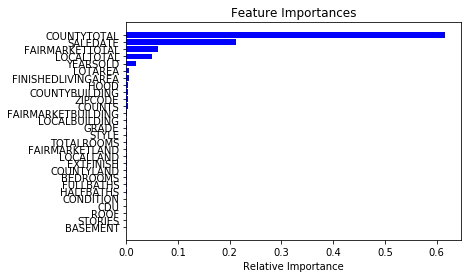

In [16]:
features = X.columns.tolist()
importances = best_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Results

We tested the following models:
* XGBoost
* RandomForest
* KNearest Neighbors
* Support Vector Machine
* Gradient Boosted Decision Tree

The best performing model was `RandomForest`. Once we found the best performing model, we implemented a `Grid Search` which aimed to exhaustively explore a specified grid and find the best parameters. Once we tuned our parameters, we tested our predictions on our Training, Validation, and Testing set.

Our testing set had a MSLE of `0.074` and an RMSE of `29610`. This indicates that we still have room for improvements, but we actually were able to get relatively close to the perforamance the Zillow sees. 